In [1]:
# classification - decision tree implemetaiton
# aim : to classify the iris plant species given in the dataset using the decision tree algorithm.

import numpy as np                # linear algebra
import pandas as pd               # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# importing the dataset and seeing it's shape
df = pd.read_csv('Iris.csv')
df.shape

(150, 6)

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = df.drop(['Species','Id'], axis=1)
y = df['Species']
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from category_encoders import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(X)
X_enc = encoder.transform(X)
X_enc.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, train_size = .66)
X_train.shape

(99, 4)

In [7]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='gini', max_depth=3)
model = classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

0.9595959595959596

In [8]:
classifier.score(X_test, y_test)

1.0

In [9]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
model.feature_importances_

array([0.        , 0.        , 0.07655111, 0.92344889])

In [11]:
list(zip(X.columns, model.feature_importances_))

[('SepalLengthCm', 0.0),
 ('SepalWidthCm', 0.0),
 ('PetalLengthCm', 0.07655110809475572),
 ('PetalWidthCm', 0.9234488919052444)]

<BarContainer object of 4 artists>

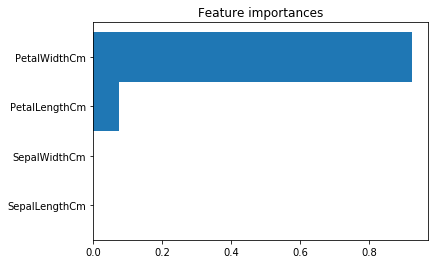

In [16]:
import matplotlib.pyplot as plt # data visualization

plt.figure()
plt.title("Feature importances")
plt.barh(X.columns, model.feature_importances_, 1)

[Text(418.5, 475.65000000000003, 'PetalWidthCm <= 0.8\ngini = 0.664\nsamples = 99\nvalue = [31, 31, 37]\nclass = Iris-virginica'),
 Text(279.0, 339.75, '0.0\n31\n[31, 0, 0]\nIris-setosa'),
 Text(558.0, 339.75, 'PetalWidthCm <= 1.75\n0.496\n68\n[0, 31, 37]\nIris-virginica'),
 Text(279.0, 203.85000000000002, 'PetalLengthCm <= 4.95\n0.245\n35\n[0, 30, 5]\nIris-versicolor'),
 Text(139.5, 67.94999999999999, '0.067\n29\n[0, 28, 1]\nIris-versicolor'),
 Text(418.5, 67.94999999999999, '0.444\n6\n[0, 2, 4]\nIris-virginica'),
 Text(837.0, 203.85000000000002, 'PetalLengthCm <= 4.85\n0.059\n33\n[0, 1, 32]\nIris-virginica'),
 Text(697.5, 67.94999999999999, '0.444\n3\n[0, 1, 2]\nIris-virginica'),
 Text(976.5, 67.94999999999999, '0.0\n30\n[0, 0, 30]\nIris-virginica')]

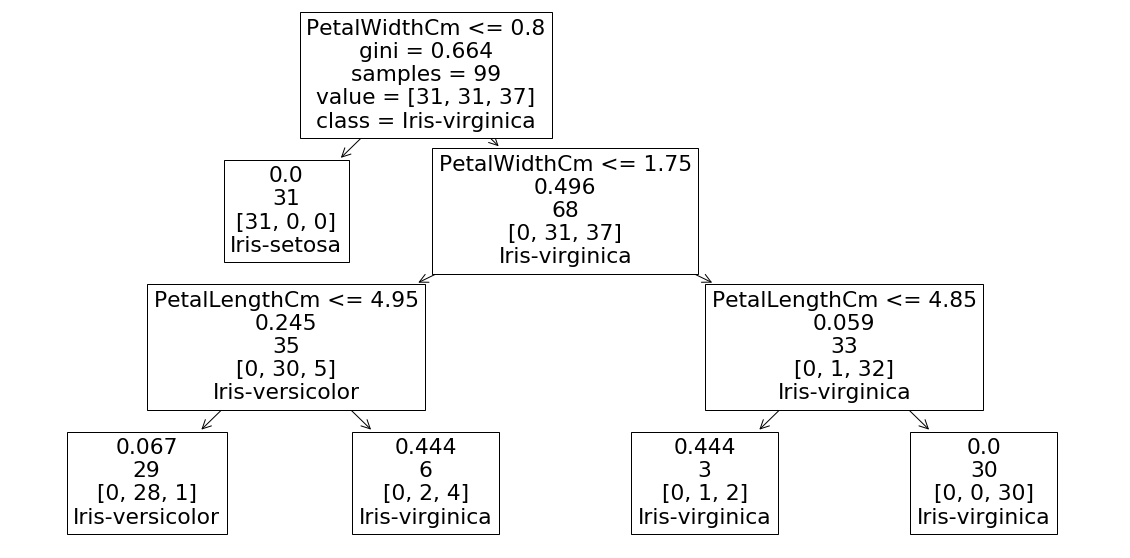

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt # data visualization

plt.figure(figsize=(20,10))

tree.plot_tree(model, feature_names = X.columns, class_names = model.classes_, label='root') 

In [18]:
from sklearn.metrics import confusion_matrix

y_predict_test = classifier.predict(X_test)
confusion_matrix(y_test, y_predict_test)

array([[19,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 13]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        19
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        51
      macro avg       1.00      1.00      1.00        51
   weighted avg       1.00      1.00      1.00        51

